In [186]:
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd
import numpy as np
import os
from csv import writer
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.ui import Select
import time
import json
import urllib
from csv import DictWriter
                      
from sklearn import linear_model
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [187]:
PATH = "C:/Users/shake/chromedriver.exe"
dataPath =  'C:/Users/shake/Student_Perdict/new/data science final proj/data/'

In [188]:
#df_2020 = pd.DataFrame()
df_2019 = pd.DataFrame()
df_2018 = pd.DataFrame()
df_2017 = pd.DataFrame()
df_2016 = pd.DataFrame()

dic_years = {'2019':df_2019, '2018':df_2018, '2017':df_2017, '2016':df_2016} 

In [189]:
#/////////////////////fix duplicates columns////////////////////////////////////////////////////////////////////////////////

def get_tables():
    i = 0
    arr = []
    driver.execute_script("""
    document.querySelectorAll("a[aria-hidden=true],span[aria-hidden=true]").forEach(function(e) {
        e.parentElement.removeChild(e);
    });
    """)
    time.sleep(5)
    temp_html = driver.find_element(By.CSS_SELECTOR, "html").get_attribute('outerHTML')
    df_school = pd.read_html(temp_html, attrs = {'class':'zebraTable ng-scope'})[0]
    for columns in df_school:
        arr.append(df_school.columns[i][0])
        i = i + 1
    df_school.columns = arr
    return df_school

In [190]:
def GetYearsDemography(fileName,url):
    try:
        driver.get(url)
        driver.implicitly_wait(20)
        driver.maximize_window()
        selectSubtext = driver.find_element(By.ID, "select2-chosen-4")
        selectSubtext.click()
        driver.find_element(By.XPATH, "//*[@id=\"select2-results-4\"]/li[" + "7" + "]").click()
        time.sleep(10)
        selectCity = driver.find_element(By.ID, "select2-chosen-8")
        selectCity.click()
        time.sleep(1)
        options = driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]")
        AllOpt = options.find_elements_by_css_selector("li")

        countOpt=len(AllOpt)
        driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]/li[" + "1" + "]").click()

        dfData = pd.DataFrame()
        firstTime = True
        for i in range(1, countOpt):

            driver.find_element(By.ID, "select2-chosen-4").click()
            driver.find_element(By.XPATH, "//*[@id=\"select2-results-4\"]/li[" + "7" + "]").click()
            selectCity = driver.find_element(By.ID, "select2-chosen-8")
            selectCity.click()
            driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]/li[" + str(i) + "]").click()
            year = selectCity.text
            temp = get_tables()
            temp.insert(0, "Years", year, True)
            print(temp)
            dfData = dfData.append(temp, ignore_index=True)
            if firstTime:
                temp.to_csv(fileName, mode='a', encoding='utf-8-sig',index=False)
                firstTime = False
            else:
                temp.to_csv(fileName, mode='a', encoding='utf-8-sig',index=False, header=False)


    except BaseException as e:
        print("Invalid URL")
    driver.quit()
    return dfData


In [191]:
#/////////////education status//////////////////////////////////////////////////////////////////////////////////////////////

options = webdriver.ChromeOptions() 
options.add_argument("--enable-webgl-developer-extensions") 
options.add_argument("--enable-webgl-draft-extensions") 
driver = webdriver.Chrome(PATH,options=options)
driver.vars = {}
url = "https://boardsgenerator.cbs.gov.il/pages/WebParts/YishuvimPage.aspx?level_1=%D7%A9%D7%9B%D7%A8%20/%20%D7%94%D7%9B%D7%A0%D7%A1%D7%95%D7%AA"
driver.get(url)
element = driver.find_element(By.ID, "select2-chosen-4")
actions = ActionChains(driver)
actions.move_to_element(element).perform()
element = driver.find_element(By.CSS_SELECTOR, "body")
actions = ActionChains(driver)
actions.move_to_element(element).perform()
element = driver.find_element(By.ID, "select2-chosen-4")
actions = ActionChains(driver)
actions.move_to_element(element).click_and_hold().perform()
element = driver.find_element(By.ID, "select2-drop-mask")
actions = ActionChains(driver)
actions.move_to_element(element).release().perform()
driver.find_element(By.XPATH, "//*[@id=\"select2-results-4\"]/li[10]").click()
time.sleep(5)
for i in range(2, 6):
    selectCity = driver.find_element(By.ID, "select2-chosen-8")
    selectCity.click()
    time.sleep(10)
    driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]/li[" + str(i) + "]").click()
    time.sleep(10)
    df_temp = get_tables()
    year = selectCity.text
    #print(year)
    dic_years[year] = df_temp
    
    dic_years[year].insert(0, "year", year, True)
driver.quit()
dic_years[year]

<ipython-input-191-98b0e700871a>:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH,options=options)


,year,סמל היישוב,שם יישוב,"ילדים בגנים של משרד החינוך סה""כ תשע""ו 2015/16","ילדים בגנים של משרד החינוך גיל 3 תשע""ו 2015/16","ילדים בגנים של משרד החינוך גיל 4 תשע""ו 2015/16","ילדים בגנים של משרד החינוך גיל 5 תשע""ו 2015/16","ילדים בגנים של משרד החינוך גיל 6 תשע""ו 2015/16","בתי ספר סה""כ תשע""ו 2015/16","בתי ספר יסודיים (כולל חינוך מיוחד) תשע""ו 2015/16",...,"תלמידים בבתי ספר על-יסודיים תשע""ו 2015/16","תלמידים בחטיבות ביניים תשע""ו 2015/16","תלמידים בבתי ספר תיכוניים תשע""ו 2015/16","ממוצע תלמידים לכיתה סה""כ תשע""ו 2015/16","ממוצע תלמידים לכיתה בבתי ספר יסודיים (כולל חינוך מיוחד) תשע""ו 2015/16","ממוצע תלמידים לכיתה בבתי ספר על-יסודיים תשע""ו 2015/16","ממוצע תלמידים לכיתה בחטיבות ביניים תשע""ו 2015/16","ממוצע תלמידים לכיתה בבתי ספר תיכוניים תשע""ו 2015/16","אחוז זכאים לתעודת בגרות מבין תלמידי כיתות יב תשע""ו 2015/16","אחוז זכאים לתעודת בגרות שעמדו בדרישות הסף של האוניברסיטאות מבין תלמידי כיתות יב תשע""ו 2015/16"
0,2016,472,אבו גוש,375,148,113,112,..,5,4,...,700,323,377,20.00,19.00,20.00,27,16.00,49.20,35.80
1,2016,473,אבו סנאן,670,224,207,230,9,6,4,...,1384,723,661,23.00,22.00,25.00,26,24.00,56.10,39.20
2,2016,182,אבן יהודה,740,215,244,255,26,8,6,...,1906,613,1293,28.00,27.00,31.00,34,29.00,81.10,71.70
3,2016,2710,אום אל-פחם,3588,1151,1144,1183,110,29,18,...,7292,3563,3729,25.79,24.85,26.81,29,25.20,52.90,32.40
4,2016,31,אופקים,1754,566,553,525,110,25,18,...,1978,582,1396,20.42,19.95,21.27,22,20.84,51.70,34.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2016,538,שעב,427,149,148,127,3,3,..,...,756,427,329,25.00,24.00,26.00,27,25.00,64,52.30
197,2016,8800,שפרעם,2012,634,665,676,37,24,15,...,4238,1853,2385,26.14,25.56,26.82,29,25.11,47.70,41.20
198,2016,5000,תל אביב -יפו,17327,5168,5786,5733,640,163,103,...,23370,10333,13037,24.03,23.63,24.57,27,22.87,74,65.40
199,2016,154,תל מונד,625,171,200,223,31,5,4,...,1751,725,1026,31.00,28.00,35.00,38,33.00,89.40,84.30


In [193]:
df_years_temp = pd.DataFrame(columns=['year', 'city', 'number_of_high_schools', 'number_of_bachelor_graduates_in_percent', 'number_of_high_school_graduates_in_percent', 'number_of_high_school_students', 'Registration_for_higher_education_within_8_years_in_percent', 'number_of_students_in_percent'])
df_education = pd.DataFrame()
for i in dic_years:
    #print(i)
    if(i == '2015'):
        break
    df_temp = dic_years[i]
    df_years_temp['year'] = df_temp.iloc[:,0].values
    df_years_temp['city'] = df_temp.iloc[:,2].values
    df_years_temp['number_of_high_schools'] =  df_temp.iloc[:,12].values
    df_years_temp['number_of_bachelor_graduates_in_percent'] = df_temp.iloc[:,29].values
    df_years_temp['number_of_high_school_graduates_in_percent'] = df_temp.iloc[:,27].values
    df_years_temp['number_of_high_school_students'] = df_temp.iloc[:,22].values
    if(i != '2016'):
        df_years_temp['Registration_for_higher_education_within_8_years_in_percent'] = df_temp.iloc[:,30].values
        df_years_temp['number_of_students_in_percent'] = df_temp.iloc[:,32].values
    df_education = df_education.append(df_years_temp)
df_education.to_csv(dataPath + 'dfEducation.csv', mode='w+', encoding='utf-8-sig',index=False)    
df_education

,year,city,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent
0,2019,אבו גוש,3,13.03,59.29,361,..,3.74
1,2019,אבו סנאן,3,12.09,65.81,592,28.50,2.32
2,2019,אבן יהודה,3,55.59,83.96,1087,46.10,3.03
3,2019,אום אל-פחם,13,8.52,59.40,3838,23.30,2.11
4,2019,אופקים,11,12.26,50.24,1551,26.60,1.84
...,...,...,...,...,...,...,...,...
196,2016,שעב,..,52.30,25,329,8.5,14.40
197,2016,שפרעם,9,41.20,25.11,2385,9.7,11.90
198,2016,תל אביב -יפו,64,65.40,22.87,13037,41.1,20.80
199,2016,תל מונד,..,84.30,33,1026,51.3,13.60


In [197]:
options = webdriver.ChromeOptions() 
options.add_argument("--enable-webgl-developer-extensions") 
options.add_argument("--enable-webgl-draft-extensions") 
driver = webdriver.Chrome(PATH,options=options)
driver.vars = {}
url = "https://boardsgenerator.cbs.gov.il/pages/WebParts/YishuvimPage.aspx?level_1=%D7%A9%D7%9B%D7%A8%20/%20%D7%94%D7%9B%D7%A0%D7%A1%D7%95%D7%AA"
driver.get(url)
time.sleep(2)
element = driver.find_element(By.ID, "select2-chosen-4")
actions = ActionChains(driver)
time.sleep(2)
actions.move_to_element(element).perform()
element = driver.find_element(By.CSS_SELECTOR, "body")
actions = ActionChains(driver)
actions.move_to_element(element).perform()
element = driver.find_element(By.ID, "select2-chosen-4")
actions = ActionChains(driver)
time.sleep(2)
actions.move_to_element(element).click_and_hold().perform()
element = driver.find_element(By.ID, "select2-drop-mask")
actions = ActionChains(driver)
time.sleep(2)
actions.move_to_element(element).release().perform()
driver.find_element(By.XPATH, "//*[@id=\"select2-results-4\"]/li[8]").click()
time.sleep(5)
for i in range(1, 6):
    selectCity = driver.find_element(By.ID, "select2-chosen-8")
    selectCity.click()
    time.sleep(10)
    driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]/li[" + str(i) + "]").click()
    time.sleep(12)
    df_temp = get_tables()
    year = selectCity.text
    #print(year)
    dic_years[year] = df_temp
    dic_years[year].insert(0, "year", year, True)
driver.quit()
dic_years[year]

<ipython-input-197-12c16bc868df>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH,options=options)


,year,סמל היישוב,שם יישוב,"שכר ממוצע לחודש של שכירים (ש""ח) כלל השכירים","שכר ממוצע לחודש של שכירים (ש""ח) גברים","שכר ממוצע לחודש של שכירים (ש""ח) נשים",אחוז שינוי ריאלי לעומת השנה הקודמת של שכר ממוצע לחודש של שכירים כלל השכירים,אחוז שינוי ריאלי לעומת השנה הקודמת של שכר ממוצע לחודש של שכירים גברים,אחוז שינוי ריאלי לעומת השנה הקודמת של שכר ממוצע לחודש של שכירים נשים,מספר השכירים,אחוז השכירים המשתכרים עד שכר מינימום,מספר העצמאים,"הכנסה ממוצעת לחודש של העצמאים (ש""ח)",אחוז שינוי ריאלי של הכנסה ממוצעת לחודש של העצמאים לעומת השנה הקודמת,אחוז העצמאים המשתכרים עד מחצית השכר הממוצע,"מדד אי-השוויון שכירים (מדד ג'יני, 0 שוויון מלא)"
0,2015,472,אבו גוש,6275.59,6928.63,5240.03,4.7,3.9,6.3,2728,42.2,130,6656.52,-0.8,53.1,0.34
1,2015,473,אבו סנאן,6060.40,7314.21,4302.60,4.3,5.3,2.3,4900,49.7,435,7940.37,9.8,44.6,0.39
2,2015,182,אבן יהודה,13502.86,16816.52,10097.43,5.2,3.6,5.7,6077,27.6,660,12913.98,-1.3,32.3,0.48
3,2015,2710,אום אל-פחם,5289.00,6096.00,3811.00,3.0,2.4,5.9,16739,56.9,1487,7864.00,3.0,44.5,0.38
4,2015,31,אופקים,9496.00,12155.00,7006.00,6.4,6.7,5.0,2967,38.1,231,9128.00,19.6,39.4,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2015,538,שעב,5312.02,6020.50,4112.21,4.7,4.1,6.9,2443,52.6,150,6452.12,3.8,60.0,0.35
220,2015,8800,שפרעם,6142.00,7286.00,4489.00,3.7,4.8,2.2,15471,48.8,1109,8546.00,7.1,41.8,0.38
221,2015,5000,תל אביב -יפו,10808.00,12888.00,8667.00,5.8,6.0,4.5,224083,31.9,23222,11685.00,6.2,37.5,0.47
222,2015,154,תל מונד,14056.74,17904.35,10202.37,4.1,4.3,2.9,5699,28.5,603,13015.24,5.9,31.0,0.50


In [209]:
df_employees_info = pd.DataFrame()
df_years_temp = pd.DataFrame(columns=['year', 'city','number_of_self_employees', 'number_of_employees', 'employees_average_monthly_wage', 'employees_average_monthly_wage_change_in_percent', 'self_employees_average_monthly_wage', 'self_employees_average_monthly_wage_change_in_percent'])
for i in dic_years:
    #print(i)
    if(i == '2015'):
        break
    df_temp = dic_years[i]
    df_years_temp['year'] = df_temp.iloc[:,0].values
    df_years_temp['city'] = df_temp.iloc[:,2].values
    df_years_temp['number_of_self_employees'] =  df_temp.iloc[:,11].values
    df_years_temp['number_of_employees'] = df_temp.iloc[:,9].values
    df_years_temp['employees_average_monthly_wage'] = df_temp.iloc[:,3].values
    df_years_temp['employees_average_monthly_wage_change_in_percent'] = df_temp.iloc[:,6].values
    df_years_temp['self_employees_average_monthly_wage'] = df_temp.iloc[:,12].values
    df_years_temp['self_employees_average_monthly_wage_change_in_percent'] = df_temp.iloc[:,13].values
    df_employees_info = df_employees_info.append(df_years_temp)

# drop שעב 2016 row/////////////////////////////////////////////////         
df_employees_info.drop
df_employees_info.drop(df_employees_info.index[219], inplace=True)
#//////////////////////////////////////////////////////////////////
        
    
df_employees_info.to_csv(dataPath + 'dfEmployees.csv', mode='w+', encoding='utf-8-sig',index=False)
df_employees_info

,year,city,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage,self_employees_average_monthly_wage_change_in_percent
0,2019,אבו גוש,151,3393,7294.03,1.35,10064.79,-7.67
1,2019,אבו סנאן,626,5841,7071.17,1.95,8456.80,-0.75
2,2019,אבן יהודה,899,6265,14054.00,1.58,12517.09,-1.72
3,2019,אום אל-פחם,1918,22149,5869.82,1.16,8883.18,-0.83
4,2019,אופקים,295,3342,9398.05,0.38,11301.74,-1.31
...,...,...,...,...,...,...,...,...
218,2016,שלומי,218,3157,8164.68,1.59,10706.09,8.26
220,2016,שפרעם,1161,16307,6236.00,2.00,8996.00,5.79
221,2016,תל אביב -יפו,24447,223935,11017.00,2.50,11908.00,2.42
222,2016,תל מונד,660,5819,13983.03,-0.02,13735.86,6.07


In [210]:

df_education = pd.read_csv(dataPath + 'dfEducation.csv')
df_employees_info = pd.read_csv(dataPath + 'dfEmployees.csv')

df_eduoEmplo = [df_education, df_employees_info]
df_eduoEmplo = pd.merge(df_education, df_employees_info,  how='left', left_on=['year','city'], right_on = ['year','city'])
df_eduoEmplo


,year,city,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage,self_employees_average_monthly_wage_change_in_percent
0,2019,אבו גוש,3,13.03,59.29,361,..,3.74,151.0,3393.0,7294.03,1.35,10064.79,-7.67
1,2019,אבו סנאן,3,12.09,65.81,592,28.50,2.32,626.0,5841.0,7071.17,1.95,8456.80,-0.75
2,2019,אבן יהודה,3,55.59,83.96,1087,46.10,3.03,899.0,6265.0,14054.00,1.58,12517.09,-1.72
3,2019,אום אל-פחם,13,8.52,59.40,3838,23.30,2.11,1918.0,22149.0,5869.82,1.16,8883.18,-0.83
4,2019,אופקים,11,12.26,50.24,1551,26.60,1.84,295.0,3342.0,9398.05,0.38,11301.74,-1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016,שעב,..,52.30,25.0,329,8.5,14.40,NaN,NaN,NaN,NaN,NaN,NaN
800,2016,שפרעם,9,41.20,25.11,2385,9.7,11.90,1161.0,16307.0,6236.00,2.00,8996.00,5.79
801,2016,תל אביב -יפו,64,65.40,22.87,13037,41.1,20.80,24447.0,223935.0,11017.00,2.50,11908.00,2.42
802,2016,תל מונד,..,84.30,33.0,1026,51.3,13.60,660.0,5819.0,13983.03,-0.02,13735.86,6.07


In [211]:
fileName= dataPath + 'YearsDemography.csv'

if os.path.isfile(fileName):
    dfDemography = pd.read_csv(fileName)
else:
    url = "https://boardsgenerator.cbs.gov.il/pages/WebParts/YishuvimPage.aspx?level_1=%D7%A9%D7%9B%D7%A8%20/%20%D7%94%D7%9B%D7%A0%D7%A1%D7%95%D7%AA"
    driver = webdriver.Chrome(PATH)
    dfDemography = GetYearsDemography(fileName,url)
    
dfDemography

,Years,שם יישוב,סמל היישוב,"צפיפות אוכלוסייה לקמ''ר ביישובים שמנו 5,000 תושבים ויותר","סה""כ אוכלוסייה בסוף השנה",יהודים ואחרים (אחוזים),יהודים (אחוזים מתוך יהודים ואחרים),ערבים (אחוזים),מוסלמים (אחוזים מתוך האוכלוסייה הערבית),נוצרים (אחוזים מתוך האוכלוסייה הערבית),...,"נישאים שיעור ל-1,000 תושבים לא נשואים בני 15 ומעלה 2019","מתגרשים סה""כ גברים ונשים 2019","מתגרשים שיעור ל-1,000 תושבים נשואים בני 15 ומעלה 2019",אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) סך מוסדות דיור משותף ברשות,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) סך דיירי דיור משותף ברשות,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים בבתי אבות ובדיור מוגן,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות חינוך,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות דת,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות אשפוז כולל הוסטלים,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות אחרים
0,2020,אבו גוש,472,4114.4,7771.0,-,-,98.9,99.8,-,...,44.6,26,8.1,4,31,-,0.3,0.04,0.06,-
1,2020,אבו סנאן,473,2136.9,14306.0,-,-,99.8,54.6,15.2,...,42.2,29,4.7,-,-,-,-,-,-,-
2,2020,אבן יהודה,182,1696.2,14020.0,100,98.4,-,-,-,...,20,40,7,5,347,1.35,0.3,-,0.83,-
3,2020,אום אל-פחם,2710,2187.4,56777.0,-,-,99.9,100,-,...,53.7,104,4.5,..,..,..,..,..,..,..
4,2020,אופקים,31,1990.8,32555.0,99.3,93.4,-,-,-,...,44.5,119,10.7,6,559,0.87,0.58,0.17,-,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,2003,שעב,538,2.9,2.8,14.04,13.56,13.17,9.43,17.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3593,2003,שפרעם,8800,15.7,15.5,13.2,12.5,10.9,8.33,16.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3594,2003,תל אביב -יפו,5000,173.8,189.6,7,5.5,4.8,5.2,18.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3595,2003,תל מונד,154,4,3.9,11.43,10.62,9.73,7.77,12.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
dfDemography=dfDemography.rename(columns={"Years":"year"})
dfDemography=dfDemography.rename(columns={"שם יישוב":"city"})
dfDemography=dfDemography.rename(columns={'סה"כ אוכלוסייה בסוף השנה':"population"})
dfDemography=dfDemography.rename(columns={'אחוז באוכלוסייה בסוף השנה בני 19-15':"Percentage of population at the end of the year aged 19-15"})
dfDemography=dfDemography.rename(columns={'אחוז באוכלוסייה בסוף השנה בני 29-20':"Percentage of population at the end of the year aged 20-29"})
dfDemography=dfDemography.rename(columns={'אחוז באוכלוסייה בסוף השנה בני 44-30':"Percentage of population at the end of the year aged 30-44"})

dfYearsCityPop=dfDemography

populationList = dfYearsCityPop['population'].tolist()
for i in range(len(populationList)):
    if (populationList[i] <= 1000) :
            populationList[i] = populationList[i] * 1000

dfYearsCityPop['population'] = populationList
dfYearsCityPop.to_csv(dataPath + 'dfYearsCityPop.csv', mode='w+', encoding='utf-8-sig',index=False)
dfYearsCityPop

,year,city,סמל היישוב,"צפיפות אוכלוסייה לקמ''ר ביישובים שמנו 5,000 תושבים ויותר",population,יהודים ואחרים (אחוזים),יהודים (אחוזים מתוך יהודים ואחרים),ערבים (אחוזים),מוסלמים (אחוזים מתוך האוכלוסייה הערבית),נוצרים (אחוזים מתוך האוכלוסייה הערבית),...,"נישאים שיעור ל-1,000 תושבים לא נשואים בני 15 ומעלה 2019","מתגרשים סה""כ גברים ונשים 2019","מתגרשים שיעור ל-1,000 תושבים נשואים בני 15 ומעלה 2019",אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) סך מוסדות דיור משותף ברשות,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) סך דיירי דיור משותף ברשות,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים בבתי אבות ובדיור מוגן,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות חינוך,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות דת,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות אשפוז כולל הוסטלים,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות אחרים
0,2020,אבו גוש,472,4114.4,7771.0,-,-,98.9,99.8,-,...,44.6,26,8.1,4,31,-,0.3,0.04,0.06,-
1,2020,אבו סנאן,473,2136.9,14306.0,-,-,99.8,54.6,15.2,...,42.2,29,4.7,-,-,-,-,-,-,-
2,2020,אבן יהודה,182,1696.2,14020.0,100,98.4,-,-,-,...,20,40,7,5,347,1.35,0.3,-,0.83,-
3,2020,אום אל-פחם,2710,2187.4,56777.0,-,-,99.9,100,-,...,53.7,104,4.5,..,..,..,..,..,..,..
4,2020,אופקים,31,1990.8,32555.0,99.3,93.4,-,-,-,...,44.5,119,10.7,6,559,0.87,0.58,0.17,-,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,2003,שעב,538,2.9,2800.0,14.04,13.56,13.17,9.43,17.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3593,2003,שפרעם,8800,15.7,15500.0,13.2,12.5,10.9,8.33,16.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3594,2003,תל אביב -יפו,5000,173.8,189600.0,7,5.5,4.8,5.2,18.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3595,2003,תל מונד,154,4,3900.0,11.43,10.62,9.73,7.77,12.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
dfYearsCityPop = pd.read_csv(dataPath + 'dfYearsCityPop.csv')

Sum_filterdfDemograph =dfYearsCityPop.iloc[:, [16,17,18]]
Sum_filterdfDemograph['precent count Age 15-44 '] = Sum_filterdfDemograph.sum(axis=1, numeric_only= True)
Sum_filterdfDemograph.insert(loc=0, column='year', value=dfYearsCityPop['year'].values)
Sum_filterdfDemograph.insert(loc=1, column='city', value=dfYearsCityPop['city'].values)
Sum_filterdfDemograph.insert(loc=2, column='population', value=dfYearsCityPop['population'].values)

Sum_filterdfDemograph = Sum_filterdfDemograph.drop(columns=['Percentage of population at the end of the year aged 19-15'])
Sum_filterdfDemograph = Sum_filterdfDemograph.drop(columns=['Percentage of population at the end of the year aged 20-29'])
Sum_filterdfDemograph = Sum_filterdfDemograph.drop(columns=['Percentage of population at the end of the year aged 30-44'])
Sum_filterdfDemograph.columns = Sum_filterdfDemograph.columns.str.replace('precent count Age 15-44', 'percent_count_Age')
Sum_filterdfDemograph["percent_count_Age"]=Sum_filterdfDemograph.iloc[:,[3]].apply(pd.to_numeric)
Sum_filterdfDemograph=Sum_filterdfDemograph.iloc[:, [0,1,2,4]]
#final_DataFrame["percent_count_Age"]
Sum_filterdfDemograph

<ipython-input-213-4ebd23b8249d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sum_filterdfDemograph['precent count Age 15-44 '] = Sum_filterdfDemograph.sum(axis=1, numeric_only= True)


,year,city,population,percent_count_Age
0,2020,אבו גוש,7771.0,45.97
1,2020,אבו סנאן,14306.0,48.03
2,2020,אבן יהודה,14020.0,35.39
3,2020,אום אל-פחם,56777.0,47.55
4,2020,אופקים,32555.0,41.65
...,...,...,...,...
3592,2003,שעב,2800.0,342.00
3593,2003,שפרעם,15500.0,1692.00
3594,2003,תל אביב -יפו,189600.0,12676.00
3595,2003,תל מונד,3900.0,298.00


In [214]:
      
final_DataFrame = pd.merge(Sum_filterdfDemograph,df_eduoEmplo, how='inner', left_on=['year','city'], right_on = ['year','city'])

final_DataFrame.to_csv(dataPath + 'finalDataFrame.csv', mode='w+', encoding='utf-8-sig',index=False)  
final_DataFrame 


,year,city,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage,self_employees_average_monthly_wage_change_in_percent
0,2019,אבו גוש,7698.0,46.76,3,13.03,59.29,361,..,3.74,151.0,3393.0,7294.03,1.35,10064.79,-7.67
1,2019,אבו סנאן,14099.0,48.24,3,12.09,65.81,592,28.50,2.32,626.0,5841.0,7071.17,1.95,8456.80,-0.75
2,2019,אבן יהודה,13826.0,35.91,3,55.59,83.96,1087,46.10,3.03,899.0,6265.0,14054.00,1.58,12517.09,-1.72
3,2019,אום אל-פחם,56109.0,47.45,13,8.52,59.40,3838,23.30,2.11,1918.0,22149.0,5869.82,1.16,8883.18,-0.83
4,2019,אופקים,30662.0,41.68,11,12.26,50.24,1551,26.60,1.84,295.0,3342.0,9398.05,0.38,11301.74,-1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016,שעב,6700.0,39.50,..,52.30,25.0,329,8.5,14.40,NaN,NaN,NaN,NaN,NaN,NaN
800,2016,שפרעם,40500.0,36.90,9,41.20,25.11,2385,9.7,11.90,1161.0,16307.0,6236.00,2.00,8996.00,5.79
801,2016,תל אביב -יפו,438800.0,23.20,64,65.40,22.87,13037,41.1,20.80,24447.0,223935.0,11017.00,2.50,11908.00,2.42
802,2016,תל מונד,12200.0,33.10,..,84.30,33.0,1026,51.3,13.60,660.0,5819.0,13983.03,-0.02,13735.86,6.07


In [215]:
def FillingAveValue(final_DataFrame):
    final_DataFrame = pd.read_csv(dataPath + 'finalDataFrame.csv')
    tempValue=-9999999999
    final_DataFrame = final_DataFrame.drop(columns=['city'])

    final_DataFrame = final_DataFrame.replace( '..', tempValue )
    final_DataFrame = final_DataFrame.replace( 'NaN', tempValue )
    final_DataFrame = final_DataFrame.replace( '-', tempValue )
    final_DataFrame = final_DataFrame.astype(float)
    final_DataFrame = final_DataFrame.replace( tempValue, np.nan)

    for column in final_DataFrame:
        #Finding the mean of the column having NaN
        mean_value=final_DataFrame[column].mean()
        if 'number_of_high_schools' in column:
            final_DataFrame[column].fillna(value=0, inplace=True)
            final_DataFrame[column] = final_DataFrame[column].astype(int)
        else:
            final_DataFrame[column].fillna(value=mean_value, inplace=True)
    
    return final_DataFrame

# Filling average value instead of null cells

In [216]:
# final_DataFrame = pd.read_csv('data/finalDataFrame.csv')
# tempValue=-9999999999
# final_DataFrame = final_DataFrame.drop(columns=['city'])
# final_DataFrame = final_DataFrame.drop(columns=['year'])

# final_DataFrame = final_DataFrame.replace( '..', tempValue )
# final_DataFrame = final_DataFrame.replace( 'NaN', tempValue )
# final_DataFrame = final_DataFrame.replace( '-', tempValue )
# final_DataFrame = final_DataFrame.astype(float)
# final_DataFrame = final_DataFrame.replace( tempValue, np.nan)
# final_DataFrame
# for column in final_DataFrame:
#     #Finding the mean of the column having NaN
#     mean_value=final_DataFrame[column].mean() 
#     final_DataFrame[column].fillna(value=mean_value, inplace=True)
# final_DataFrame

In [217]:
final_DataFrame=FillingAveValue(final_DataFrame)
final_DataFrame

,year,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage,self_employees_average_monthly_wage_change_in_percent
0,2019.0,7698.0,46.76,3,13.03,59.29,361.0,24.730698,3.74,151.0000,3393.000,7294.030000,1.350000,10064.7900,-7.670000
1,2019.0,14099.0,48.24,3,12.09,65.81,592.0,28.500000,2.32,626.0000,5841.000,7071.170000,1.950000,8456.8000,-0.750000
2,2019.0,13826.0,35.91,3,55.59,83.96,1087.0,46.100000,3.03,899.0000,6265.000,14054.000000,1.580000,12517.0900,-1.720000
3,2019.0,56109.0,47.45,13,8.52,59.40,3838.0,23.300000,2.11,1918.0000,22149.000,5869.820000,1.160000,8883.1800,-0.830000
4,2019.0,30662.0,41.68,11,12.26,50.24,1551.0,26.600000,1.84,295.0000,3342.000,9398.050000,0.380000,11301.7400,-1.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016.0,6700.0,39.50,0,52.30,25.00,329.0,8.500000,14.40,1421.6925,17520.195,8712.128312,2.974587,9856.2883,3.007075
800,2016.0,40500.0,36.90,9,41.20,25.11,2385.0,9.700000,11.90,1161.0000,16307.000,6236.000000,2.000000,8996.0000,5.790000
801,2016.0,438800.0,23.20,64,65.40,22.87,13037.0,41.100000,20.80,24447.0000,223935.000,11017.000000,2.500000,11908.0000,2.420000
802,2016.0,12200.0,33.10,0,84.30,33.00,1026.0,51.300000,13.60,660.0000,5819.000,13983.030000,-0.020000,13735.8600,6.070000


In [218]:

def generateGragh(columnsName,color1,color2):
    x = reshapeCol(final_DataFrame,columnsName)
    plt.scatter(x=x,y=y,c=color1,marker='s',label=columnsName)
    m = lr.fit(X=x, y=y)
    plt.plot(x,m.predict(x),color2,linewidth=3)

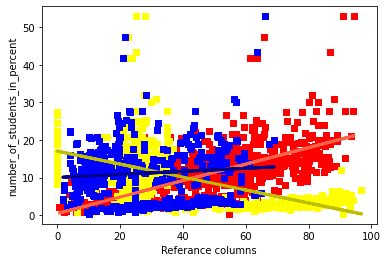

In [219]:
#/////////////////////////////////////////test 1////////////////////////////////////////////////////

def reshapeCol(final_DataFrame,str):
  return final_DataFrame[[str]].values.reshape(final_DataFrame[str].shape[0],1)  



columns_names =['number_of_bachelor_graduates_in_percent', 'number_of_high_school_graduates_in_percent', 'Registration_for_higher_education_within_8_years_in_percent', 'number_of_students_in_percent']


number_of_students='number_of_students_in_percent'

number_of_bachelor_graduates_in_percent='number_of_bachelor_graduates_in_percent'
number_of_high_school_graduates_in_percent='number_of_high_school_graduates_in_percent'
Registration_for_higher_education_within_8_years_in_percent='Registration_for_higher_education_within_8_years_in_percent'

lr = linear_model.LinearRegression() # create a linear regression object

y = final_DataFrame[[number_of_students]].values.reshape(final_DataFrame[number_of_students].shape[0],1)


generateGragh(number_of_bachelor_graduates_in_percent,'r','tomato')
generateGragh(number_of_high_school_graduates_in_percent,'yellow','y')
generateGragh(Registration_for_higher_education_within_8_years_in_percent,'blue','darkblue')


#take all columns for next blocks
x = final_DataFrame[['number_of_bachelor_graduates_in_percent', 'number_of_high_school_graduates_in_percent', 'Registration_for_higher_education_within_8_years_in_percent']]#plt.scatter(x=x,y=y,c='b',marker='s',label='all')
m = lr.fit(X=x, y=y);


plt.xlabel('Referance columns')
plt.ylabel(number_of_students)
plt.show()

In [220]:
print("R2:",lr.score(x,y))
print("R2:",r2_score(y,lr.predict(x)))

R2: 0.5900176076939934
R2: 0.5900176076939934


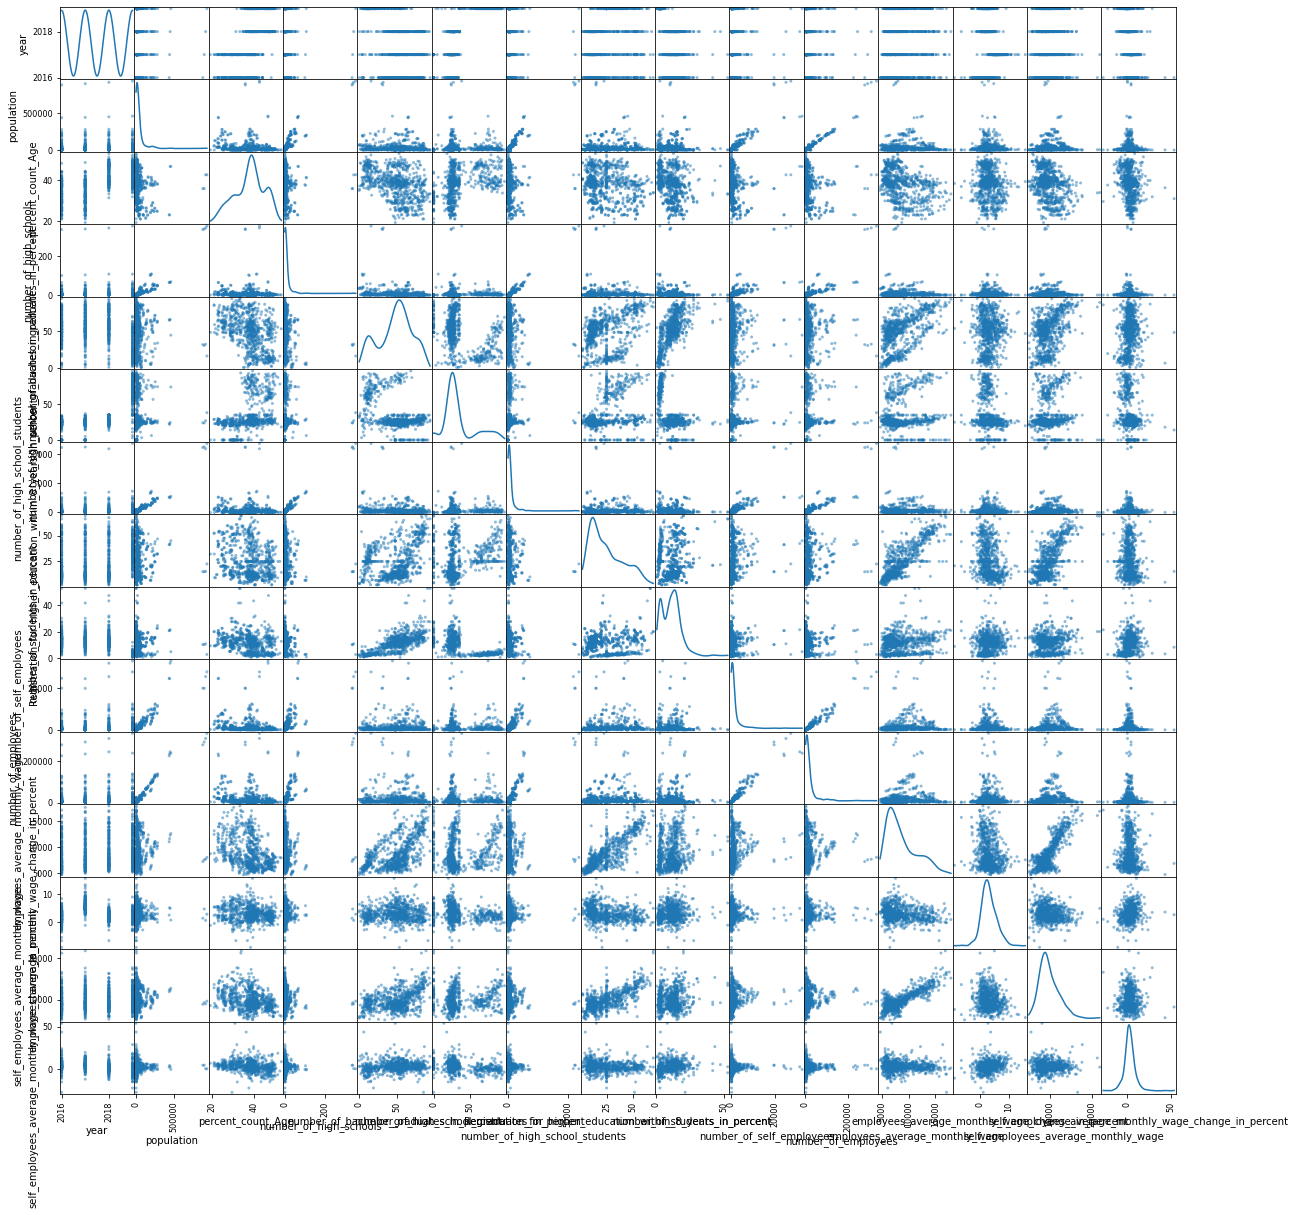

In [221]:
#print(final_DataFrame.corr())
pd.plotting.scatter_matrix(final_DataFrame, figsize=(20,20), diagonal='kde')
plt.show()

In [223]:
# def sse(Y, Y_HAT):  
#     sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
#     return sse

# print(final_DataFrame.iloc[:,0:1])
# SSE = sse(final_DataFrame.number_of_students_in_percent.tolist(),m.predict(final_DataFrame.iloc[:,0:1]).flatten())

# print(SSE)

In [224]:
final_DataFrame=FillingAveValue(final_DataFrame)
final_DataFrame

,year,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage,self_employees_average_monthly_wage_change_in_percent
0,2019.0,7698.0,46.76,3,13.03,59.29,361.0,24.730698,3.74,151.0000,3393.000,7294.030000,1.350000,10064.7900,-7.670000
1,2019.0,14099.0,48.24,3,12.09,65.81,592.0,28.500000,2.32,626.0000,5841.000,7071.170000,1.950000,8456.8000,-0.750000
2,2019.0,13826.0,35.91,3,55.59,83.96,1087.0,46.100000,3.03,899.0000,6265.000,14054.000000,1.580000,12517.0900,-1.720000
3,2019.0,56109.0,47.45,13,8.52,59.40,3838.0,23.300000,2.11,1918.0000,22149.000,5869.820000,1.160000,8883.1800,-0.830000
4,2019.0,30662.0,41.68,11,12.26,50.24,1551.0,26.600000,1.84,295.0000,3342.000,9398.050000,0.380000,11301.7400,-1.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016.0,6700.0,39.50,0,52.30,25.00,329.0,8.500000,14.40,1421.6925,17520.195,8712.128312,2.974587,9856.2883,3.007075
800,2016.0,40500.0,36.90,9,41.20,25.11,2385.0,9.700000,11.90,1161.0000,16307.000,6236.000000,2.000000,8996.0000,5.790000
801,2016.0,438800.0,23.20,64,65.40,22.87,13037.0,41.100000,20.80,24447.0000,223935.000,11017.000000,2.500000,11908.0000,2.420000
802,2016.0,12200.0,33.10,0,84.30,33.00,1026.0,51.300000,13.60,660.0000,5819.000,13983.030000,-0.020000,13735.8600,6.070000


In [225]:
dataInPercent = final_DataFrame.filter(regex='percent|Percentage|precent').columns
for i in dataInPercent:
    final_DataFrame[i] = ((final_DataFrame.iloc[:,1])*(final_DataFrame[i]/100))
    print(i)

# final_DataFrame.to_csv(dataPath + 'finalDataFrame.csv', mode='w+', encoding='utf-8-sig',index=False)
final_DataFrame

percent_count_Age
number_of_bachelor_graduates_in_percent
number_of_high_school_graduates_in_percent
Registration_for_higher_education_within_8_years_in_percent
number_of_students_in_percent
employees_average_monthly_wage_change_in_percent
self_employees_average_monthly_wage_change_in_percent


,year,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage,self_employees_average_monthly_wage_change_in_percent
0,2019.0,7698.0,3599.5848,3,1003.0494,4564.1442,361.0,1903.769154,287.9052,151.0000,3393.000,7294.030000,103.923000,10064.7900,-590.436600
1,2019.0,14099.0,6801.3576,3,1704.5691,9278.5519,592.0,4018.215000,327.0968,626.0000,5841.000,7071.170000,274.930500,8456.8000,-105.742500
2,2019.0,13826.0,4964.9166,3,7685.8734,11608.3096,1087.0,6373.786000,418.9278,899.0000,6265.000,14054.000000,218.450800,12517.0900,-237.807200
3,2019.0,56109.0,26623.7205,13,4780.4868,33328.7460,3838.0,13073.397000,1183.8999,1918.0000,22149.000,5869.820000,650.864400,8883.1800,-465.704700
4,2019.0,30662.0,12779.9216,11,3759.1612,15404.5888,1551.0,8156.092000,564.1808,295.0000,3342.000,9398.050000,116.515600,11301.7400,-401.672200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016.0,6700.0,2646.5000,0,3504.1000,1675.0000,329.0,569.500000,964.8000,1421.6925,17520.195,8712.128312,199.297362,9856.2883,201.474025
800,2016.0,40500.0,14944.5000,9,16686.0000,10169.5500,2385.0,3928.500000,4819.5000,1161.0000,16307.000,6236.000000,810.000000,8996.0000,2344.950000
801,2016.0,438800.0,101801.6000,64,286975.2000,100353.5600,13037.0,180346.800000,91270.4000,24447.0000,223935.000,11017.000000,10970.000000,11908.0000,10618.960000
802,2016.0,12200.0,4038.2000,0,10284.6000,4026.0000,1026.0,6258.600000,1659.2000,660.0000,5819.000,13983.030000,-2.440000,13735.8600,740.540000


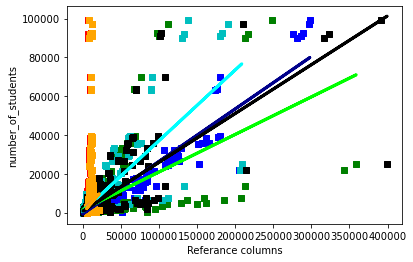

In [241]:
from sklearn import linear_model
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
number_of_students='number_of_students_in_percent'

employees_average_monthly_wage='employees_average_monthly_wage'
self_employees_average_monthly_wage	='self_employees_average_monthly_wage'
number_of_bachelor_graduates_in_percent='number_of_bachelor_graduates_in_percent'
number_of_high_school_graduates_in_percent='number_of_high_school_graduates_in_percent'
Registration_for_higher_education_within_8_years_in_percent='Registration_for_higher_education_within_8_years_in_percent'
percent_count_Age='percent_count_Age'

lr = linear_model.LinearRegression() # create a linear regression object
y = final_DataFrame[[number_of_students]].values.reshape(final_DataFrame[number_of_students].shape[0],1)

#print(final_DataFrame)
generateGragh(employees_average_monthly_wage,'r','tomato')
generateGragh(number_of_bachelor_graduates_in_percent,'blue','darkblue')
generateGragh(number_of_high_school_graduates_in_percent,'green','lime')
generateGragh(Registration_for_higher_education_within_8_years_in_percent,'c','aqua')
generateGragh(percent_count_Age,'k','k')
generateGragh(self_employees_average_monthly_wage,'orange','orange')

x = final_DataFrame[[percent_count_Age,'employees_average_monthly_wage', 'self_employees_average_monthly_wage','number_of_bachelor_graduates_in_percent', 'number_of_high_school_graduates_in_percent', 'Registration_for_higher_education_within_8_years_in_percent']]

m = lr.fit(X=x, y=y);

plt.xlabel('Referance columns')
plt.ylabel('number_of_students')
plt.show()

In [227]:
print("R2:",lr.score(x,y))
print("R2:",r2_score(y,lr.predict(x)))

R2: 0.9515592437478937
R2: 0.9515592437478937


                                                        year  population  \
year                                                1.000000    0.009800   
population                                          0.009800    1.000000   
percent_count_Age                                   0.070161    0.979035   
number_of_high_schools                             -0.052303    0.882670   
number_of_bachelor_graduates_in_percent            -0.088625    0.876932   
number_of_high_school_graduates_in_percent          0.189097    0.868332   
number_of_high_school_students                      0.032553    0.951853   
Registration_for_higher_education_within_8_year...  0.081041    0.872937   
number_of_students_in_percent                      -0.126782    0.841750   
number_of_self_employees                            0.057183    0.906137   
number_of_employees                                 0.020775    0.972454   
employees_average_monthly_wage                      0.097907    0.057820   
employees_av

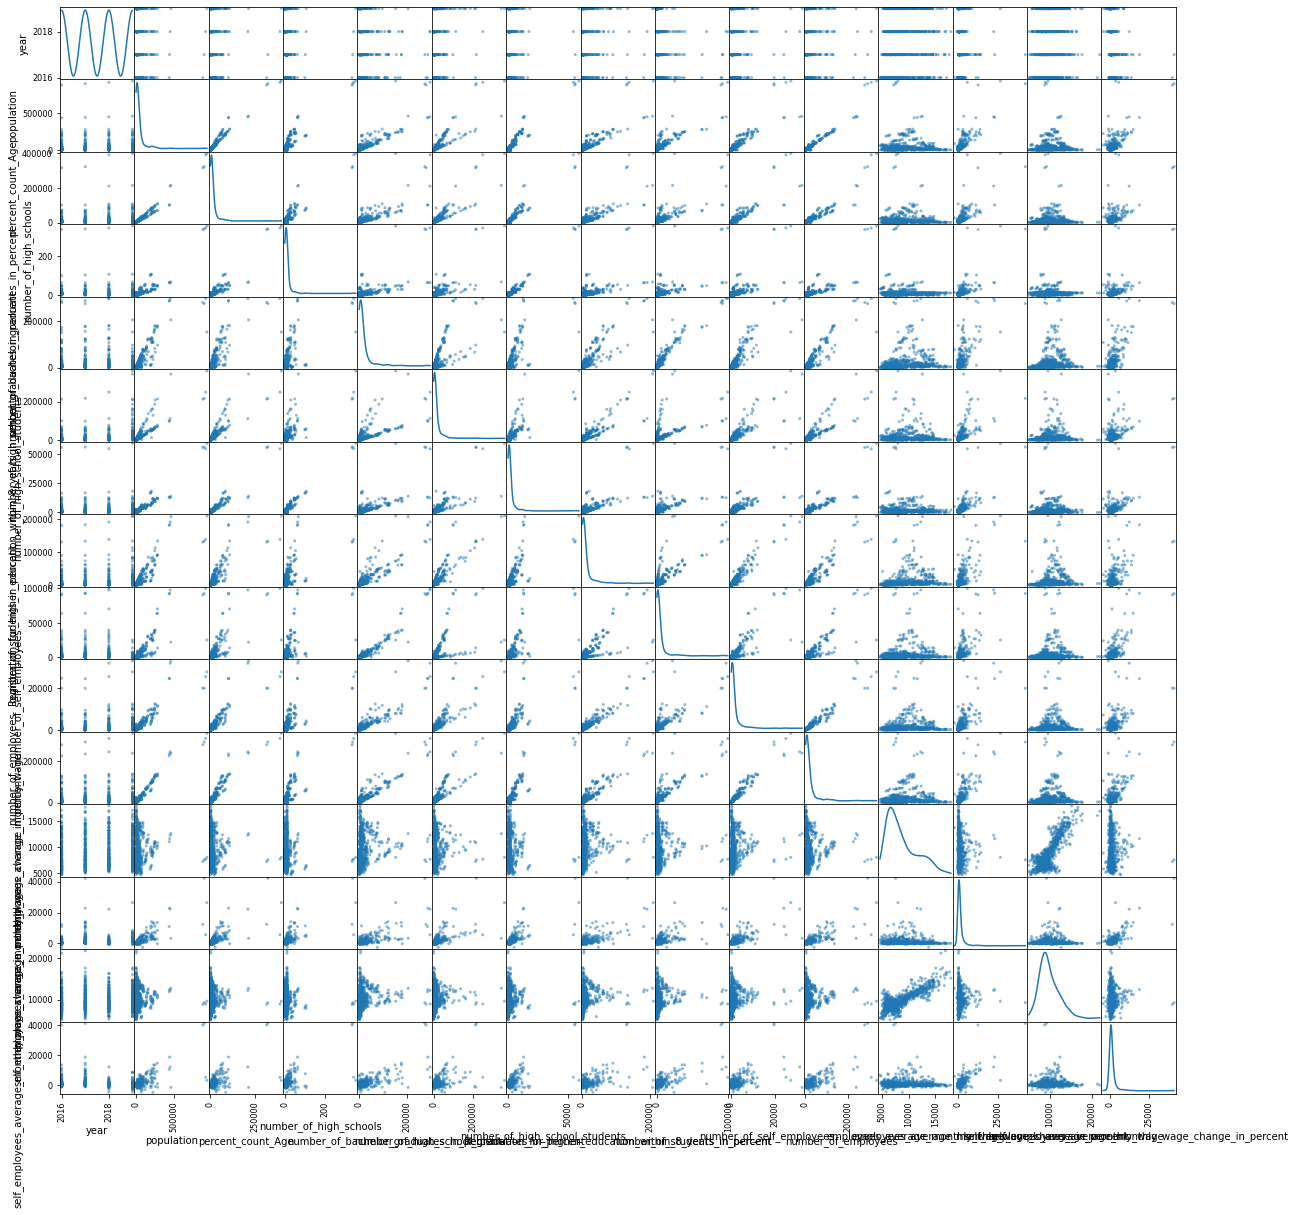

In [444]:
#print(final_DataFrame.corr())
pd.plotting.scatter_matrix(final_DataFrame, figsize=(20, 20), diagonal='kde')
plt.show()